In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### 1. Pre-process the dataset.

In [6]:
df.drop(columns=["Unnamed: 0", "key"], inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace = True)

In [9]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [11]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               month = df.pickup_datetime.dt.month,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [12]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,5,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,7,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,8,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,6,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,8,3
...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,10,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,3,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,6,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,14,5,2


In [13]:
df = df.drop(["pickup_datetime"], axis =1)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,5,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,7,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,8,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,6,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,8,3
...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,10,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,3,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,6,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695416,1,14,5,2


In [14]:
# function to calculate the travel distance from the longitudes and latitudes
from math import *
    
def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1
        
        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2
        
        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371 
        travel_dist.append(c)
            
    return  travel_dist

In [15]:
df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

### 2. Identify outliers.

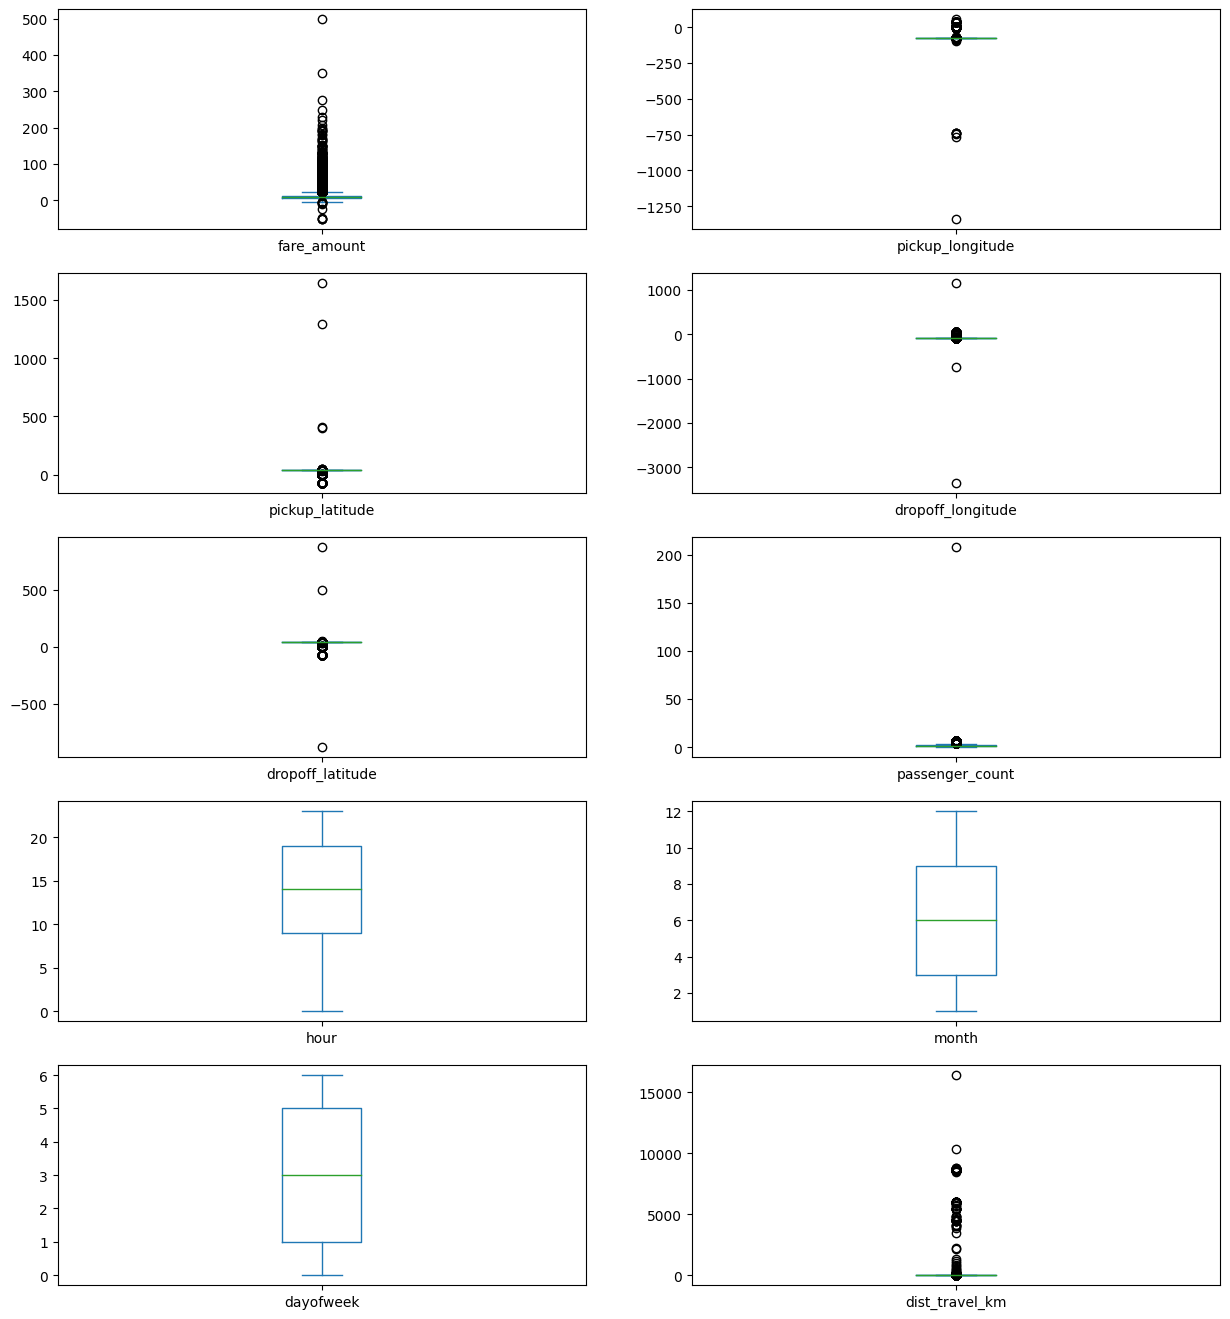

In [16]:
import matplotlib.pyplot as plt
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [17]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [18]:
df = treat_outliers_all(df , df.iloc[: , 0::])

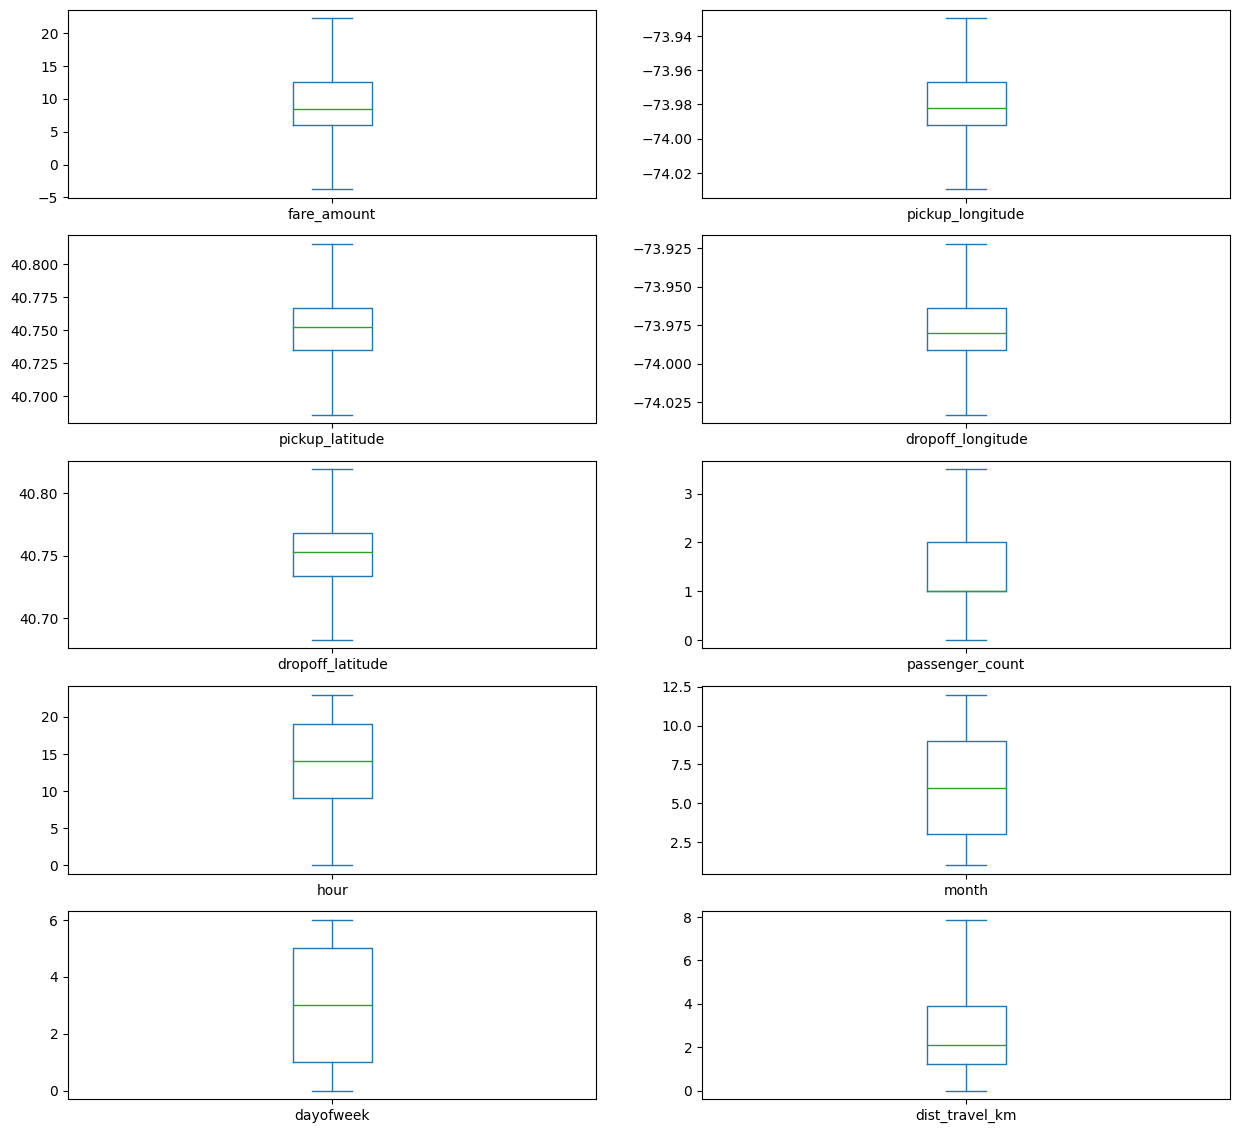

In [19]:
#Boxplot shows that dataset is free from outliers
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 
plt.show()

### 3. Check the correlation.

In [20]:
#Function to find the correlation
corr = df.corr() 

<Axes: >

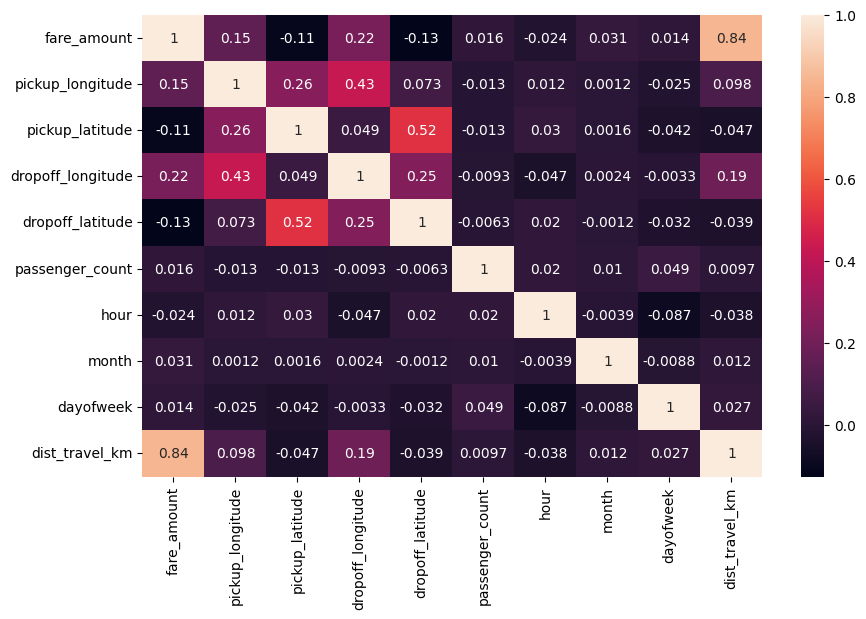

In [21]:
import seaborn as sns
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

### 4. Implement linear regression and random forest regression models.

In [22]:
# Dividing the dataset into feature and target values 
df_x = df[['passenger_count','hour','month','dayofweek','dist_travel_km']]
df_y = df['fare_amount']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Dividing the dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [25]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,dayofweek,dist_travel_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,5,3,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,7,4,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,8,0,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,6,4,1.661683
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,8,3,4.475450
...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,10,6,0.112210
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,3,4,1.875050
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,0,6,0,7.865286
199998,14.50,-73.997124,40.725452,-73.983215,40.695416,1.0,14,5,2,3.539715


In [26]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred_lin = reg.predict(x_test)
print(y_pred_lin)

[ 5.30488894  6.36591522  8.66986124 ... 10.38616731 12.17306232
 12.06295738]


In [28]:
from sklearn.ensemble import RandomForestRegressor

#Here n_estimators means number of trees you want to build before making the prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
y_pred_rf = rf.predict(x_test)
print(y_pred_rf)

[ 5.9985  6.446   7.289  ... 11.239   9.3015 11.8505]


### 5. Evaluate the models and compare their respective scores like R2, RMSE, etc

In [30]:
from sklearn import metrics 
from sklearn.metrics import r2_score 

In [31]:
reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin))
reg_squared = r2_score(y_test, y_pred_lin)

print("Model name : Linear Regression")
print("RMSE : ", reg_RMSE)
print("R2Score : ", reg_squared)

Model name : Linear Regression
RMSE :  2.895928192060434
R2Score :  0.7177222381646371


In [32]:
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
rf_squared = r2_score(y_test, y_pred_rf)

print("Model name : Linear Regression")
print("RMSE : ", reg_RMSE)
print("R2Score : ", reg_squared)

Model name : Linear Regression
RMSE :  2.895928192060434
R2Score :  0.7177222381646371


### 6. Predict the values

In [33]:
print(reg.predict(pd.DataFrame({'passenger_count': [2], 'hour': [3], 'month': [2.0], 'dayofweek': [1], 'dist_travel_km': [5]})))

[14.36932896]


In [34]:
print(rf.predict(pd.DataFrame({'passenger_count': [2], 'hour': [3], 'month': [2.0], 'dayofweek': [1], 'dist_travel_km': [5]})))

[12.2535]
